In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar100.load_data(label_mode='fine')
#100 classes containing 600 images each. There are 500 training images and 100 testing images per class. 
#Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras import layers
from keras.layers import BatchNormalization

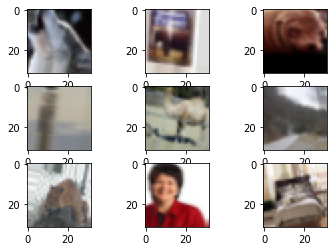

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
from keras.preprocessing.image import ImageDataGenerator
#inspired from https://github.com/kesonyk/FunProject/blob/master/cifar100.py
datagen = ImageDataGenerator(
                            rotation_range=15, 
                            width_shift_range=0.15,
                            height_shift_range=0.15,
                            zoom_range=0.2,
                            horizontal_flip=True)

# inspired from : https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb
datagen.fit(x_train)
batch_size=128
nb_epoch=25

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

#reshape into images
channels=3
img_rows=img_cols=32
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 3)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

num_classes=100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
input_shape = [32, 32, 3] #inspiré de l'example de Keras, ajout de layers, batchnormalization & dropout
num_classes=100
# Flatten 2D images to 1D vectors

X_train = x_train.reshape((x_train.shape[0], -1))
X_test = x_test.reshape((x_test.shape[0], -1))
input_dim = X_train.shape[1]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(Dropout(0.35))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(70, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='softmax'))

print(model.summary())
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy","top_k_categorical_accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                4080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)               

In [13]:
epochs = 40
batch_size = 200
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/40
250/250 [==============================] - 4s 16ms/step - loss: 3.5604 - accuracy: 0.1439 - top_k_categorical_accuracy: 0.4061 - val_loss: 3.4389 - val_accuracy: 0.1812 - val_top_k_categorical_accuracy: 0.4420
Epoch 2/40
250/250 [==============================] - 4s 15ms/step - loss: 3.5603 - accuracy: 0.1443 - top_k_categorical_accuracy: 0.4062 - val_loss: 3.4463 - val_accuracy: 0.1791 - val_top_k_categorical_accuracy: 0.4367
Epoch 3/40
250/250 [==============================] - 4s 15ms/step - loss: 3.5660 - accuracy: 0.1428 - top_k_categorical_accuracy: 0.4069 - val_loss: 3.4420 - val_accuracy: 0.1814 - val_top_k_categorical_accuracy: 0.4425
Epoch 4/40
250/250 [==============================] - 4s 15ms/step - loss: 3.5570 - accuracy: 0.1437 - top_k_categorical_accuracy: 0.4091 - val_loss: 3.4381 - val_accuracy: 0.1798 - val_top_k_categorical_accuracy: 0.4408
Epoch 5/40
250/250 [==============================] - 4s 15ms/step - loss: 3.5531 - accuracy: 0.1459 - top_k_categor

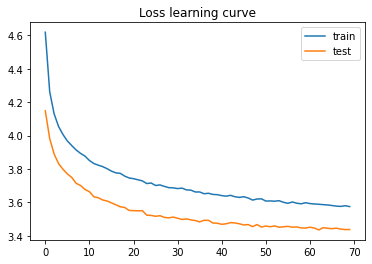

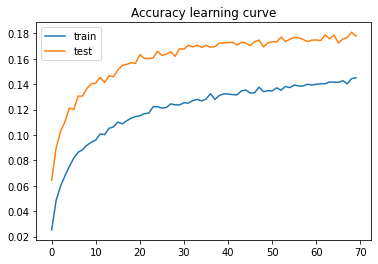

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()#MLP model, not optimal for images mais quand même 18% de top-1 et 45% de top-5 validation accuracy (très dépendant de la forme du modèle)

In [ ]:
lenet = Sequential(# inspiré du 1er network de LeCun
    [
        keras.Input(shape=input_shape),
        Conv2D(20, kernel_size=(5, 5), activation="tanh", padding="same", input_shape=input_shape, name="C1"),
        BatchNormalization(),
        layers.Dropout(0.35),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(24, kernel_size=(5, 5), activation="relu"),
        BatchNormalization(),
        layers.Dropout(0.35),
        Conv2D(40, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        layers.Dropout(0.35),
        Conv2D(120, kernel_size=(5, 5), activation='tanh'),
        BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        Dense(100, activation='tanh'),
        layers.Dropout(0.35),
        Dense(40, activation='relu'),
        BatchNormalization(),
        Dense(80, activation='tanh'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 32, 32, 20)        1520      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 24)        12024     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 24)        96        
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 24)       

In [ ]:
epochs = 60
batch_size = 200

lenet.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy","top_k_categorical_accuracy"])

history_lenet=lenet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/60
250/250 [==============================] - 162s 647ms/step - loss: 4.1253 - accuracy: 0.0696 - top_k_categorical_accuracy: 0.2381 - val_loss: 4.2012 - val_accuracy: 0.0628 - val_top_k_categorical_accuracy: 0.2223
Epoch 2/60
250/250 [==============================] - 159s 635ms/step - loss: 3.7942 - accuracy: 0.1126 - top_k_categorical_accuracy: 0.3375 - val_loss: 4.0977 - val_accuracy: 0.0795 - val_top_k_categorical_accuracy: 0.2585
Epoch 3/60
250/250 [==============================] - 159s 637ms/step - loss: 3.6590 - accuracy: 0.1300 - top_k_categorical_accuracy: 0.3772 - val_loss: 4.0700 - val_accuracy: 0.0865 - val_top_k_categorical_accuracy: 0.2800
Epoch 4/60
250/250 [==============================] - 159s 636ms/step - loss: 3.5581 - accuracy: 0.1464 - top_k_categorical_accuracy: 0.4055 - val_loss: 4.2524 - val_accuracy: 0.0763 - val_top_k_categorical_accuracy: 0.2531
Epoch 5/60
250/250 [==============================] - 160s 640ms/step - loss: 3.4716 - accuracy: 0.1603 

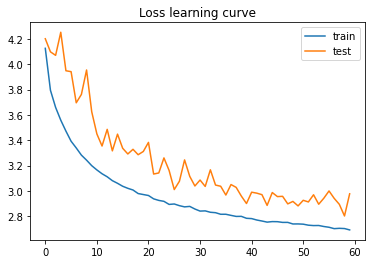

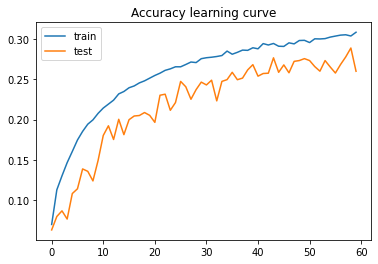

In [ ]:
tf.keras.utils.plot_model(lenet, show_shapes=True)
plt.plot(history_lenet.history['loss'], label='train')
plt.plot(history_lenet.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history_lenet.history['accuracy'], label='train')
plt.plot(history_lenet.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()#training is rather slow but the model doesn't seem to overfit too much, increasing the number of epochs might 
#allow to reach higher performance

In [ ]:
history_lenetaugmented_data=lenet.fit_generator(datagen.flow(x_train, y_train, batch_size=200),
                     epochs=60, validation_data=(x_test, y_test))

In [ ]:
from tensorflow.keras.layers import Concatenate, Input# inspiré de l'inception network
from tensorflow.keras.models import Model
from keras.layers import MaxPool2D
def inception_layer(tensor, n_filters):
    branch1x1 = Conv2D(n_filters, kernel_size=(1, 1), activation="relu", padding="same")(tensor)
    dropout=Dropout(0.35)(tensor)
    branch5x5 = Conv2D(n_filters, kernel_size=(5, 5), activation="relu", padding="same")(tensor)
    bn=BatchNormalization()(tensor)
    branch3x3 = Conv2D(n_filters, kernel_size=(3, 3), activation="relu", padding="same")(tensor)
    branch_pool = MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding="same")(tensor)

    output = Concatenate(axis=-1)(
        [branch1x1,bn,dropout, branch5x5, bn,dropout, branch3x3,bn,dropout, branch_pool]
    )
    return output

input_tensor = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(5, 5), padding="same")(input_tensor)
x= Dropout(0.4)(x)
x = inception_layer(x, 32)
x = Flatten()(x)
x= Dense(40, activation='relu')(x)
x=BatchNormalization()(x)
output_tensor = Dense(100, activation="softmax")(x)
mini_inception = Model(inputs=input_tensor, outputs=output_tensor)

mini_inception.summary()
epochs = 15
batch_size = 200

mini_inception.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 32)   2432        input_3[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 32, 32, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 32)   1056        dropout_6[0][0]                  
_______________________________________________________________________________________

In [ ]:
history_inception=mini_inception.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
#high overfitting and rather bad performance on the validation set (25% max), might need more dropout and less epoches

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 32)   2432        input_4[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 32, 32, 32)   0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 32)   1056        dropout_9[0][0]                  
_______________________________________________________________________________________

In [ ]:
tf.keras.utils.plot_model(mini_inception, show_shapes=True)
plt.plot(history_inception.history['loss'], label='train')
plt.plot(history_inception.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history_inception.history['accuracy'], label='train')
plt.plot(history_inception.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
modelBase = Sequential()
modelBase.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
modelBase.add(Dropout(0.35))
modelBase.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelBase.add(BatchNormalization())
modelBase.add(Conv2D(120, (5, 5), activation='relu'))
modelBase.add(Dropout(0.35))
modelBase.add(MaxPooling2D(pool_size=(2, 2)))
modelBase.add(Flatten())
modelBase.add(Dense(1000, activation='relu'))
modelBase.add(Dropout(0.35))
modelBase.add(BatchNormalization())
modelBase.add(Dense(num_classes, activation='softmax'))

modelBase.summary()
epochs = 25
batch_size = 200
modelBase.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_base=modelBase.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 120)       192120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 120)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 120)         0

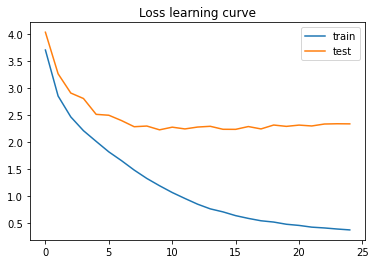

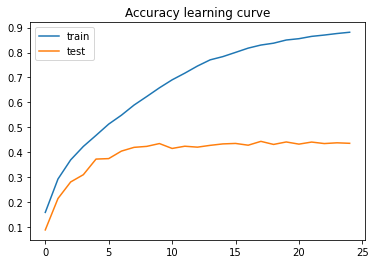

In [ ]:
tf.keras.utils.plot_model(modelBase, show_shapes=True)
plt.plot(history_base.history['loss'], label='train')
plt.plot(history_base.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history_base.history['accuracy'], label='train')
plt.plot(history_base.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()#big overfitting in the end but performance achieved by the 10th epoche, 
#the number of epochs must have been too high, maybe I could increase the drop-out percentage to 0.5

In [ ]:
import tensorflow as tf
mobileNetmodel=tf.keras.applications.MobileNet(input_shape=input_shape,dropout=0.04,weights=None,classes=100)
#mobileNetmodel.summary()
epochs = 12
batch_size = 200
mobileNetmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy","top_k_categorical_accuracy"])

history_mobile=mobileNetmodel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/12
250/250 [==============================] - 542s 2s/step - loss: 4.3500 - accuracy: 0.0500 - top_k_categorical_accuracy: 0.1743 - val_loss: 4.6789 - val_accuracy: 0.0100 - val_top_k_categorical_accuracy: 0.0500
Epoch 2/12
250/250 [==============================] - 540s 2s/step - loss: 3.7747 - accuracy: 0.1189 - top_k_categorical_accuracy: 0.3424 - val_loss: 4.8651 - val_accuracy: 0.0100 - val_top_k_categorical_accuracy: 0.0500
Epoch 3/12
250/250 [==============================] - 543s 2s/step - loss: 3.4748 - accuracy: 0.1677 - top_k_categorical_accuracy: 0.4259 - val_loss: 3.6002 - val_accuracy: 0.1472 - val_top_k_categorical_accuracy: 0.3894
Epoch 4/12
250/250 [==============================] - 544s 2s/step - loss: 3.2589 - accuracy: 0.2063 - top_k_categorical_accuracy: 0.4864 - val_loss: 3.7445 - val_accuracy: 0.1607 - val_top_k_categorical_accuracy: 0.4218
Epoch 5/12
250/250 [==============================] - 540s 2s/step - loss: 3.0764 - accuracy: 0.2371 - top_k_categor

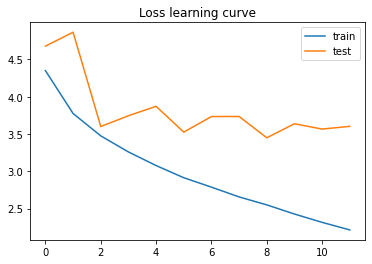

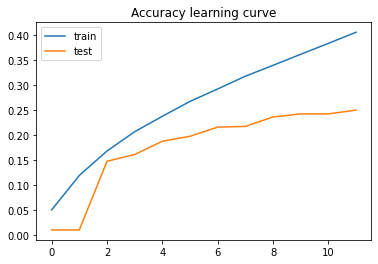

In [ ]:
tf.keras.utils.plot_model(mobileNetmodel, show_shapes=True)
plt.plot(history_mobile.history['loss'], label='train')
plt.plot(history_mobile.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history_mobile.history['accuracy'], label='train')
plt.plot(history_mobile.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()

In [ ]:
# source : # inspired from : https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb
reg=None #best scoring network
num_filters=32
ac='relu'
from keras.optimizers import Adam
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0.2
modelDernier = Sequential()

modelDernier.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
modelDernier.add(Dropout(drop_conv))

modelDernier.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
modelDernier.add(Dropout(drop_conv))

modelDernier.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
modelDernier.add(BatchNormalization(axis=-1))
modelDernier.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
modelDernier.add(Dropout(drop_conv))

modelDernier.add(Flatten())
modelDernier.add(Dense(512, activation=ac,kernel_regularizer=reg))
modelDernier.add(BatchNormalization())
modelDernier.add(Dropout(drop_dense))
modelDernier.add(Dense(num_classes, activation='softmax'))

modelDernier.compile(loss='categorical_crossentropy', metrics=['accuracy',"top_k_categorical_accuracy"],optimizer=opt)
history_last=modelDernier.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 439s 1s/step - loss: 3.9722 - accuracy: 0.1369 - top_k_categorical_accuracy: 0.3548 - val_loss: 3.3538 - val_accuracy: 0.2091 - val_top_k_categorical_accuracy: 0.4782
Epoch 2/30
391/391 [==============================] - 437s 1s/step - loss: 2.9674 - accuracy: 0.2701 - top_k_categorical_accuracy: 0.5716 - val_loss: 2.5198 - val_accuracy: 0.3663 - val_top_k_categorical_accuracy: 0.6685
Epoch 3/30
391/391 [==============================] - 437s 1s/step - loss: 2.5097 - accuracy: 0.3548 - top_k_categorical_accuracy: 0.6749 - val_loss: 2.2416 - val_accuracy: 0.4105 - val_top_k_categorical_accuracy: 0.7254
Epoch 4/30
391/391 [==============================] - 432s 1s/step - loss: 2.2418 - accuracy: 0.4106 - top_k_categorical_accuracy: 0.7284 - val_loss: 2.0914 - val_accuracy: 0.4489 - val_top_k_categorical_accuracy: 0.7540
Epoch 5/30
391/391 [==============================] - 432s 1s/step - loss: 2.0506 - accuracy: 0.4534 - top_k_categor

In [ ]:
tf.keras.utils.plot_model(modelDernier, show_shapes=True)
plt.plot(history_last.history['loss'], label='train')
plt.plot(history_last.history['val_loss'], label='test')
plt.title('Loss learning curve')
plt.legend()
plt.show()

plt.plot(history_last.history['accuracy'], label='train')
plt.plot(history_last.history['val_accuracy'], label='test')
plt.title('Accuracy learning curve')
plt.legend()
plt.show()

NameError: ignored

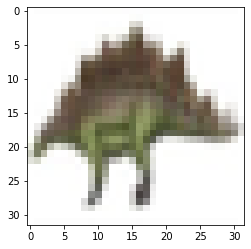

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()


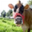

In [ ]:
%matplotlib inline
from PIL import Image
Image.fromarray(x_train[0])
